In [1]:
# Assignment 1
#Credit card fraud
import pandas as pd 
file_path = "/Users/judy/Desktop/Python_Work/Data_Analysis_Course_Practice/fraud_challenge_150k.csv"
df_raw = pd.read_csv(file_path)


### Selection on Data

#### Keep it as it is (numerical)
- account_age_days: 149892 non-null (float64)
- transaction_amt: 149870 non-null (float64)
- transaction_adj_amt: 149886 non-null (float64)
- historic_velocity: 149885 non-null (float64)
- days_since_last_logon: 149864 non-null (float64)
- inital_amount: 149872 non-null (float64)

#### Keep but modify (text)
- email_domain: 149910 non-null (object)
- billing_city: 149884 non-null (object)
- billing_state: 149887 non-null (object)
- currency: 149892 non-null (object)
- cvv: 149877 non-null (object)
- signature_image: 149895 non-null (object)
- transaction_type: 149884 non-null (object)
- transaction_env: 149877 non-null (object)
- tranaction_initiate: 149874 non-null (object)

#### Exclude
- ip_address: 149873 non-null (object)
- user_agent: 149887 non-null (object)
- billing_postal: 149876 non-null (float64)
- card_bin: 149872 non-null (float64)
- phone_number: 149873 non-null (object)
- EVENT_TIMESTAMP: 149888 non-null (object)
- applicant_name: 149857 non-null (object)
- billing_address: 149866 non-null (object)
- merchant_id: 149893 non-null (object)
- locale: 149866 non-null (object)



In [2]:
df = df_raw.drop(columns = ['ip_address','user_agent','billing_postal','card_bin','phone_number','EVENT_TIMESTAMP','applicant_name','billing_address','merchant_id','locale'])
df.head()

,account_age_days,transaction_amt,transaction_adj_amt,historic_velocity,email_domain,billing_city,billing_state,currency,cvv,signature_image,transaction_type,transaction_env,tranaction_initiate,days_since_last_logon,inital_amount,EVENT_LABEL
0,3371.0,2167.0,56.0,2572.0,perez-garza.com,Woodsburgh,California,cad,D,F,U,X,O,59.0,13646.0,legit
1,2714.0,2045.0,48.0,4517.0,mcneil-ortega.com,West Kevin,Florida,cad,X,X,H,W,J,0.0,11930.0,legit
2,6987.0,2892.0,61.0,5007.0,davis-calderon.com,Lorichester,Utah,cad,X,Q,X,X,T,83.0,7412.0,legit
3,2712.0,3040.0,28.0,6022.0,rose-lee.org,Stephenmouth,Virginia,usd,G,G,C,N,M,24.0,4623.0,legit
4,3598.0,2976.0,66.0,2600.0,nash.net,New Brianmouth,South Carolina,cad,X,F,F,G,K,21.0,1905.0,legit


In [3]:
#Label encoding
#Columns where parameter values are alphabetic letters:
#'transaction_env', 'cvv', 'signature_image','transaction_type', 'tranaction_initiate'
df = df.replace({'transaction_env': {chr(i + 64): i for i in range(1, 27)}})
df = df.replace({'cvv': {chr(i + 64): i for i in range(1, 27)}})
df = df.replace({'signature_image': {chr(i + 64): i for i in range(1, 27)}})
df = df.replace({'transaction_type': {chr(i + 64): i for i in range(1, 27)}})
df = df.replace({'tranaction_initiate': {chr(i + 64): i for i in range(1, 27)}})

#MTokenization
#'email_domain','billing_city','billing_state','currency'

df['email_domain']=df.groupby('email_domain')['email_domain'].transform('count')
df['billing_city']=df.groupby('billing_city')['billing_city'].transform('count')
df['billing_state']=df.groupby('billing_state')['billing_state'].transform('count')
df['currency']=df.groupby('currency')['currency'].transform('count')
df.head ()


,account_age_days,transaction_amt,transaction_adj_amt,historic_velocity,email_domain,billing_city,billing_state,currency,cvv,signature_image,transaction_type,transaction_env,tranaction_initiate,days_since_last_logon,inital_amount,EVENT_LABEL
0,3371.0,2167.0,56.0,2572.0,46.0,43.0,7813.0,113751.0,4.0,6.0,21.0,24.0,15.0,59.0,13646.0,legit
1,2714.0,2045.0,48.0,4517.0,38.0,38.0,5115.0,113751.0,24.0,24.0,8.0,23.0,10.0,0.0,11930.0,legit
2,6987.0,2892.0,61.0,5007.0,23.0,30.0,6591.0,113751.0,24.0,17.0,24.0,24.0,20.0,83.0,7412.0,legit
3,2712.0,3040.0,28.0,6022.0,22.0,27.0,6756.0,31768.0,7.0,7.0,3.0,14.0,13.0,24.0,4623.0,legit
4,3598.0,2976.0,66.0,2600.0,45.0,32.0,2826.0,113751.0,24.0,6.0,6.0,7.0,11.0,21.0,1905.0,legit


In [4]:
#Fix labels
df.loc[df['EVENT_LABEL'].str.contains('legit', na=False), 'EVENT_LABEL'] = 1
df.loc[df['EVENT_LABEL'].str.contains('fraud', na=False), 'EVENT_LABEL'] = 0
df['EVENT_LABEL'] = df['EVENT_LABEL'].astype('int')
df.head()

,account_age_days,transaction_amt,transaction_adj_amt,historic_velocity,email_domain,billing_city,billing_state,currency,cvv,signature_image,transaction_type,transaction_env,tranaction_initiate,days_since_last_logon,inital_amount,EVENT_LABEL
0,3371.0,2167.0,56.0,2572.0,46.0,43.0,7813.0,113751.0,4.0,6.0,21.0,24.0,15.0,59.0,13646.0,1
1,2714.0,2045.0,48.0,4517.0,38.0,38.0,5115.0,113751.0,24.0,24.0,8.0,23.0,10.0,0.0,11930.0,1
2,6987.0,2892.0,61.0,5007.0,23.0,30.0,6591.0,113751.0,24.0,17.0,24.0,24.0,20.0,83.0,7412.0,1
3,2712.0,3040.0,28.0,6022.0,22.0,27.0,6756.0,31768.0,7.0,7.0,3.0,14.0,13.0,24.0,4623.0,1
4,3598.0,2976.0,66.0,2600.0,45.0,32.0,2826.0,113751.0,24.0,6.0,6.0,7.0,11.0,21.0,1905.0,1


In [5]:
y = df['EVENT_LABEL'] #Target

X = df.drop(columns = ['EVENT_LABEL'])

In [6]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
import shap


In [7]:
# Train and Test Data Seperation 
df_columns = X.columns
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train = pd.DataFrame(data = X_train, columns = df_columns)
X_test = pd.DataFrame(data = X_test, columns = df_columns)
X_train.head() 

,account_age_days,transaction_amt,transaction_adj_amt,historic_velocity,email_domain,billing_city,billing_state,currency,cvv,signature_image,transaction_type,transaction_env,tranaction_initiate,days_since_last_logon,inital_amount
74818,5484.0,3190.0,58.0,6607.0,44.0,8.0,8040.0,113751.0,24.0,21.0,24.0,6.0,15.0,41.0,12074.0
51472,4440.0,3277.0,61.0,4450.0,61.0,34.0,1265.0,113751.0,6.0,8.0,9.0,4.0,9.0,86.0,13020.0
101632,5424.0,2722.0,58.0,6960.0,47.0,23.0,7605.0,113751.0,3.0,21.0,23.0,24.0,20.0,70.0,13099.0
49474,4263.0,2226.0,59.0,4121.0,41.0,19.0,5115.0,113751.0,3.0,4.0,8.0,7.0,5.0,72.0,3388.0
62682,5054.0,2557.0,38.0,5160.0,39.0,31.0,5897.0,113751.0,26.0,8.0,23.0,4.0,13.0,6.0,14172.0


In [8]:
# Train XGBoost model
model = xgb.XGBClassifier(n_estimators = 100, tree_method = 'hist', subsample = 0.7, n_jobs = 6,random_state=42,learning_rate=0.3)
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=6,
              num_parallel_tree=None, random_state=42, ...)

In [9]:
# Predictions
y_pred = model.predict(X_test)
print('The model accuracy on training data is:', np.round(model.score(X_train, y_train),3))
print('The model accuracy on testing data is:', np.round(model.score(X_test, y_test),3))

y_pred = model.predict(X_test)
precision = metrics.precision_score(y_test,y_pred)
recall = metrics.recall_score(y_test,y_pred)
f1_score = metrics.f1_score(y_test,y_pred)

print('The model precision on testing data is:', np.round(precision,3))
print('The model recall on testing data is:', np.round(recall,3))
print('The model F1 score on testing data is:', np.round(f1_score,3))


The model accuracy on training data is: 0.991
The model accuracy on testing data is: 0.984
The model precision on testing data is: 0.986
The model recall on testing data is: 0.997
The model F1 score on testing data is: 0.991


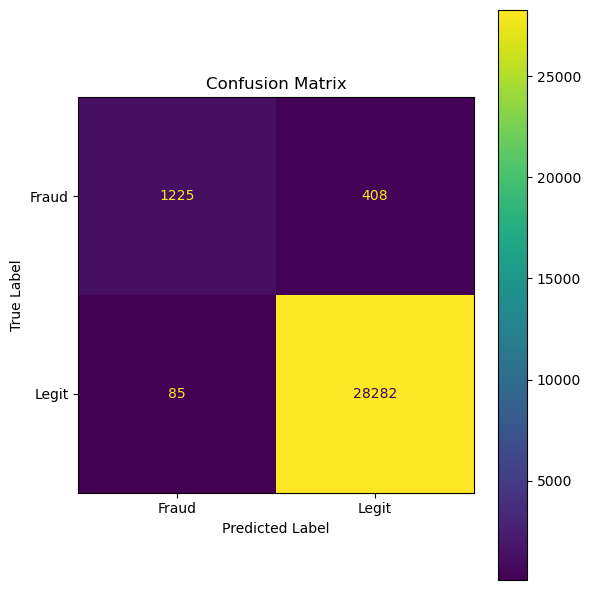

In [10]:
import matplotlib.pyplot as plt

# Calculate the confusion matrix
conf_matrix = metrics.confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(6, 6))
cm = metrics.ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Fraud', 'Legit'])
cm.plot(cmap='viridis', values_format='g', ax=ax)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()


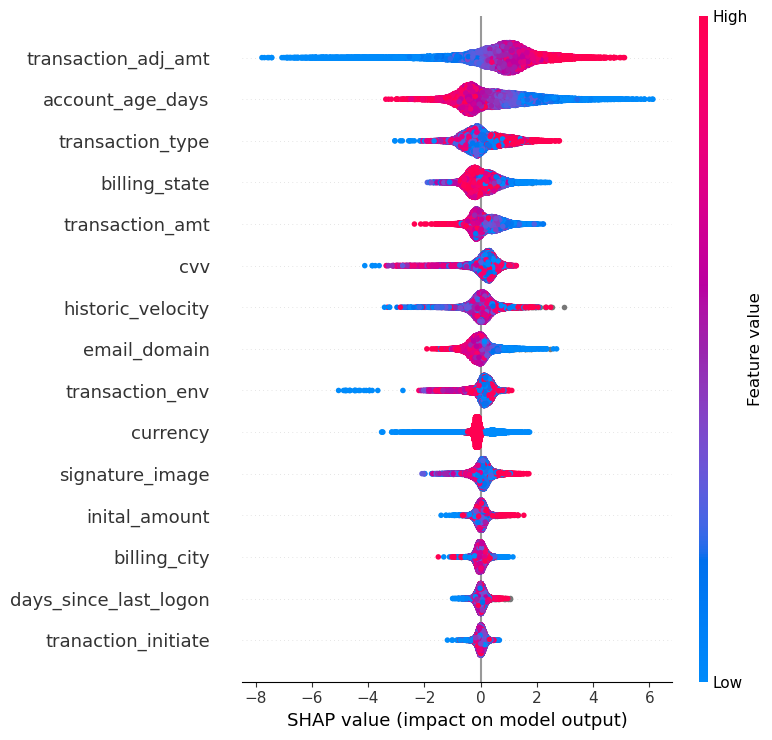

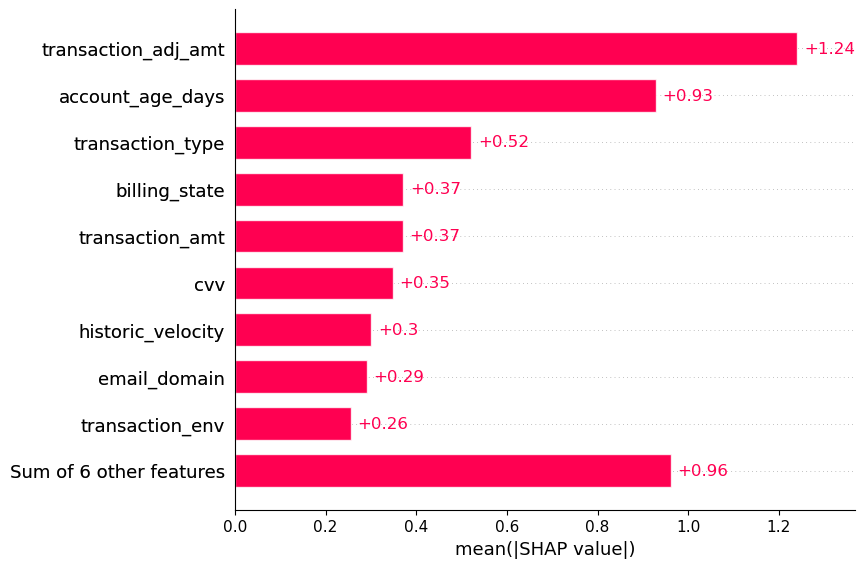

In [11]:
# SHAP analysis

explainer = shap.Explainer(model)
shap_values = explainer.shap_values(X_test)

# Generate SHAP summary plot
shap.summary_plot(shap_values, X_test)
values = explainer(X_test)
shap.plots.bar(values)



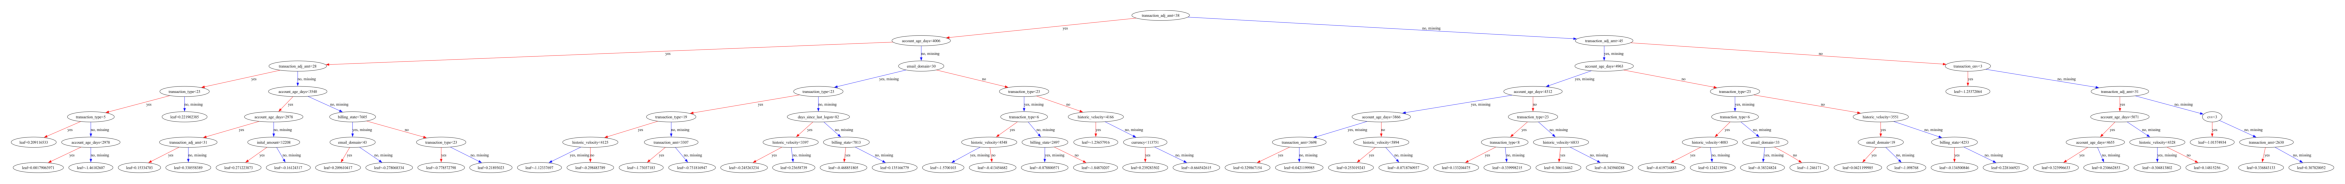

In [12]:
import xgboost as xgb
from matplotlib import pyplot as plt
import matplotlib

# Load your XGBoost model here

matplotlib.rcParams['figure.figsize'] = 30,30
xgb.plot_tree(model, fontsize = 50)
plt.show()

## Which features can be included in the model?

- Based on the provided SHAP values, it is clear that the following features have a significant impact on the predictions of the model:

    transaction_adj_amt,
    transaction_type,
    billing_state,
    transaction_amt,
    cvv,
    historic_velocity,
    email_domain,
    transaction_env

    These features have SHAP values greater than 0.25 or less than -0.25. 

- The other features have relatively low SHAP values, but they can still be included in the model, as they might contribute to the model's overall performance.

## What is the effect of model (hyper) parameters?

__It seeems that n_estimators and learning_rate values having some certain impact on the result of the model. Below are the results when running manually with different value of n_estimators and learning_rate.__ 

<span style="color:green">- model = xgb.XGBClassifier(n_estimators = 100, tree_method = 'hist', subsample = 0.7, n_jobs = 6,random_state=42,learning_rate=0.3)  

The model accuracy on training data is: 0.991

The model accuracy on testing data is: 0.984

The model precision on testing data is: 0.986

The model recall on testing data is: 0.997

The model F1 score on testing data is: 0.991 


<span style="color:green">- model = xgb.XGBClassifier(n_estimators = 100, tree_method = 'hist', subsample = 0.7, n_jobs = 6,random_state=42,learning_rate=0.05)

The model accuracy on training data is: 0.981

The model accuracy on testing data is: 0.979

The model precision on testing data is: 0.981

The model recall on testing data is: 0.997

The model F1 score on testing data is: 0.989


<span style="color:green">- model = xgb.XGBClassifier(n_estimators = 100, tree_method = 'hist', subsample = 0.7, n_jobs = 6,random_state=42,learning_rate=0.1)

The model accuracy on training data is: 0.985

The model accuracy on testing data is: 0.982

The model precision on testing data is: 0.984

The model recall on testing data is: 0.998

The model F1 score on testing data is: 0.991


<span style="color:green">- model = xgb.XGBClassifier(n_estimators = 10, tree_method = 'hist', subsample = 0.7, n_jobs = 6,random_state=42,learning_rate=0.1)

The model accuracy on training data is: 0.967

The model accuracy on testing data is: 0.966

The model precision on testing data is: 0.966

The model recall on testing data is: 0.999

The model F1 score on testing data is: 0.982

<span style="color:green">- model = xgb.XGBClassifier(n_estimators = 30, tree_method = 'hist', subsample = 0.7, n_jobs = 6,random_state=42,learning_rate=0.1)

The model accuracy on training data is: 0.977

The model accuracy on testing data is: 0.976

The model precision on testing data is: 0.978

The model recall on testing data is: 0.997

The model F1 score on testing data is: 0.987


<span style="color:green">- model = xgb.XGBClassifier(n_estimators = 30, tree_method = 'hist', subsample = 0.7, n_jobs = 6,random_state=42,learning_rate=0.3)

The model accuracy on training data is: 0.984

The model accuracy on testing data is: 0.981

The model precision on testing data is: 0.983

The model recall on testing data is: 0.997

The model F1 score on testing data is: 0.99

#### <span style="color:rgba(255,0,0,0.7)">__Conclusion based on the manual test: The model shows best value with n_estimators = 100 and a learning_rate= 0.3__

In [13]:
#another test using GridSearch to define the best value of n_estimators and learning_rate for the model

from sklearn.model_selection import GridSearchCV
import xgboost as xgb

# Define the parameter grid
param_grid = {
    'learning_rate': [0.05, 0.1, 0.3],
    'n_estimators': [10, 30, 50, 100]
}

# Create the XGBoost classifier
xgb_clf = xgb.XGBClassifier(tree_method='hist', subsample=0.7, n_jobs=6, random_state=42)

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=xgb_clf, param_grid=param_grid, cv=5, scoring='f1', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)


Best hyperparameters: {'learning_rate': 0.3, 'n_estimators': 100}


__Based on the results of the model evaluations with different hyperparameters, we can observe the effects of changing certain hyperparameters on the model's performance:__

- *Learning Rate:*

    Model 1: Learning rate = 0.3, F1 score = 0.991

    Model 2: Learning rate = 0.05, F1 score = 0.989

    Model 3: Learning rate = 0.1, F1 score = 0.991

    Model 4: Learning rate = 0.1, F1 score = 0.982

    Model 5: Learning rate = 0.1, F1 score = 0.987

    Model 6: Learning rate = 0.3, F1 score = 0.99

    <u>Observations</u>:

        Generally, lower learning rates (0.05) result in slightly lower F1 scores compared to moderate (0.1) or higher (0.3) learning rates.
        However, extremely low learning rates (0.05) may not necessarily lead to better performance.
        Models with moderate learning rates (0.1) tend to perform well across different evaluation metrics.


- *Number of Estimators:*

    Model 1: n_estimators = 100, F1 score = 0.991

    Model 2: n_estimators = 100, F1 score = 0.989

    Model 3: n_estimators = 100, F1 score = 0.991

    Model 4: n_estimators = 10, F1 score = 0.982

    Model 5: n_estimators = 30, F1 score = 0.987

    Model 6: n_estimators = 30, F1 score = 0.99
    
    <u>Observations</u>:

        Increasing the number of estimators generally improves model performance up to a certain point (e.g., from 10 to 100).
        However, using too many estimators (e.g., 100) may not significantly improve performance compared to a moderate number (e.g., 30).
        

- *Other Parameters:*

    The other parameters such as tree_method, subsample, and n_jobs seem to have less pronounced effects on model performance in these experiments. However, they can still impact training time and computational efficiency.

#### <span style="color:rgba(255,0,0,0.7)"> => In summary, the choice of hyperparameters such as learning rate and the number of estimators can significantly affect the model's performance, with moderate values often leading to better results. It's essential to experiment with different hyperparameter settings to find the optimal combination for the specific dataset and problem at hand.</span>

#### <span style="color:rgba(255,0,0,0.7)"> => In conclusion, by comparing both manual test for different parameters and GridSearch test, n_estimators = 100 and learning_rate=0.3 yield the best result for the model. 




## How successful is the model, F1 score, recall, precision and confusion matrix? 

- *F1 Score:*

In this case, the model achieved an F1 score of 0.991 on the testing data. This high F1 score indicates strong overall performance in accurately identifying both legitimate and fraudulent transactions.

- *Recall:*

With a recall of 0.997 on the testing data, the model correctly identified a high percentage of actual positive cases, indicating its ability to capture fraudulent transactions effectively.

- *Precision:*

With a precision of 0.986 on the testing data, the model exhibited a high degree of accuracy in classifying transactions as fraudulent, minimizing false positives.

- *Confusion Matrix:*

<u>True Negatives (TN)</u>: Transactions that were correctly predicted as legitimate (not fraudulent). In this case, there are 1225 such transactions.

<u>False Positives (FP)</u>: Transactions that were incorrectly predicted as fraudulent when they were actually legitimate. In this case, there are 408 such transactions.

<u>False Negatives (FN)</u>: Transactions that were incorrectly predicted as legitimate when they were actually fraudulent. In this case, there are 85 such transactions.

<u>True Positives (TP)</u>: Transactions that were correctly predicted as fraudulent. In this case, there are 28282 such transactions.

These values provide a detailed breakdown of the model's predictions and highlight its performance in correctly identifying both legitimate and fraudulent transactions.




